# K means Clustering on Mall_Customers 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("Mall_Customers.csv",index_col='CustomerID')
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum() 

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [8]:
x = df.iloc[:,[2,3]]
x

,Annual_Income_(k$),Spending_Score
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


## Elbow Method to find optimal K.

In [10]:
wcss = []
for i in range(1,11):
      kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        # use any int in random_state for determinisn
      kmeans.fit(x)
      wcss.append(kmeans.inertia_) ## inertia computes WCSS
        

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


## Plotting WCSS to Clusters 

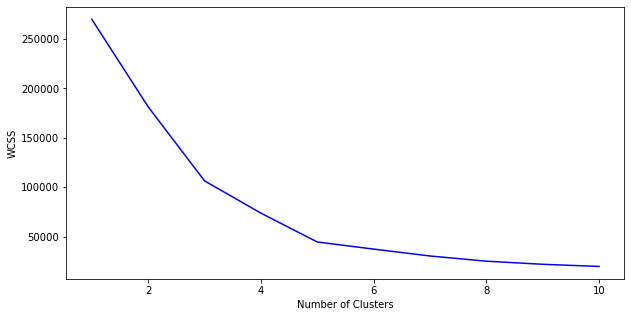

In [11]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# K = 5 is optimal
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred=kmeans.fit_predict(X)

In [13]:
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [16]:
kmeans.inertia_

44448.45544793369

In [17]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [18]:
kmeans.n_iter_

3

In [48]:
x = np.array(x)
x[y_pred==2, 0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

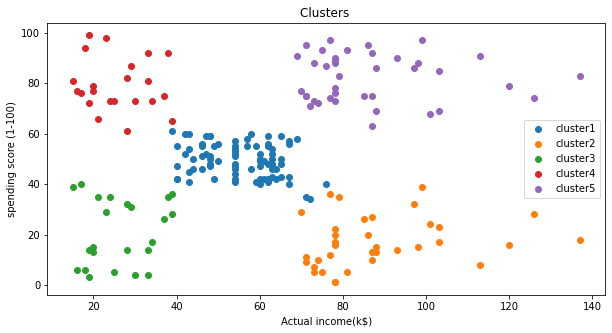

In [49]:
plt.figure(figsize=(10,5))
for i in range(5):
    plt.scatter(x[y_pred==i, 0],x[y_pred==i, 1],label='cluster'+str(i+1))
    #plt.scatter(x[y_pred==i, 0],x[y_pred==i, 1],label='cluster'+str(i+1))
    plt.legend() 



plt.title('Clusters ')
plt.xlabel('Actual income(k$)')
plt.ylabel('spending score (1-100)')
plt.show()